# Decision Tree and random forest classification with Python

We'll try to use decision tree and  random forest to create a model that directly predicts weather a customer is going to purchase a product or not based on the age and estimated saraly.

Let's grab it and use it!

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
dataset['Purchased'].unique()

array([0, 1], dtype=int64)

In [5]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Check for null values

In [6]:
dataset.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


<AxesSubplot:>

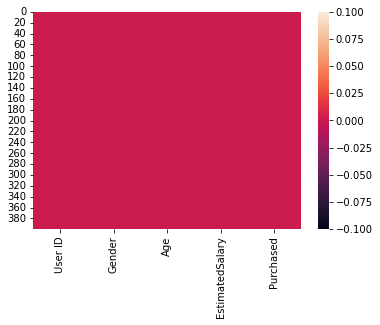

In [7]:
sns.heatmap(dataset.isnull())

In [8]:
dataset.drop(['Gender','User ID'], axis=1, inplace=True)

## Check correlation

In [9]:
dataset.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


## Standardize the Variables

Because the Decision tree classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the decision tree classifier, than variables that are on a small scale.

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(dataset.drop('Purchased',axis=1))

StandardScaler()

In [13]:
scaled_features = scaler.transform(dataset.drop('Purchased',axis=1))

In [14]:
type(scaled_features)

numpy.ndarray

In [15]:
scaled_features.dtype

dtype('float64')

In [16]:
df_feat = pd.DataFrame(scaled_features,columns=['Age', 'EstimatedSalary'])
df_feat.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


<AxesSubplot:>

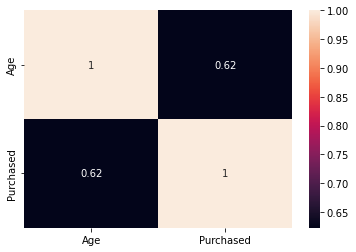

In [17]:
sns.heatmap(dataset[['Age','Purchased']].corr(),annot=True)

## Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_feat,dataset['Purchased'],
                                                    test_size=0.30,random_state=60)

In [20]:
y_test.shape

(120,)

## Using decision tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
y_pred = classifier.predict(X_test)

## Predictions and Evaluations

Let's evaluate our decision tree model!

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [24]:
cm

array([[77,  5],
       [14, 24]], dtype=int64)

In [25]:
((101)/120)*100

84.16666666666667

## Using random forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
rfc_pred = rfc.predict(X_test)

## Predictions and Evaluations

Let's evaluate our random forest model!

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rfc_pred)

In [29]:
cm

array([[75,  7],
       [ 6, 32]], dtype=int64)

In [30]:
((108)/120)*100

90.0

# Great Job!